The total cost of a route is calculated as the sum of Euclidean distances between of each subsequent pairs:

In [1]:
from math import dist
def get_cost(route):
    cost = 0
    for o,d in zip(route[1:], route[:-1]):
        cost+=dist(N[o], N[d])
    return cost

def get_total_cost(routes):
    total_cost = 0
    for route in routes:
        total_cost+=get_cost(route)
    return total_cost

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def add_labels(node_labels, node_coords, ax):
    for n, label in enumerate(node_labels):
        ax.annotate(
            str(label),
            xy=node_coords[n],
            xytext=(-4, 6),
            textcoords="offset points")
        
def draw_route(route, coords, ax, color="k"):
    edges = []
    for o, d in zip(route[:-1], route[1:]):
        o_x, o_y = coords[o]
        d_x, d_y = coords[d]
        edge = patches.FancyArrowPatch(
                (o_x, o_y),
                (d_x, d_y),
                edgecolor=color,
                arrowstyle='->',
                linewidth=1,
                mutation_scale=10,
                connectionstyle="arc", # angle = manhattan connection
                zorder=0)
        ax.add_artist(edge)
        edges.append(edge)
    return edges

In [3]:
from pprint import pprint
np.random.seed(42)

def get_random_solution(n_customers, n_vehicles):
    routes = []
    customer_ids = np.arange(1,n_customers+1)
    for _ in range(n_vehicles-1):
        
        if len(customer_ids) == 1:
            break
        
        size = np.random.randint(low=1, high=len(customer_ids))
        route = list(np.random.choice(customer_ids, size=size, replace=False))
        routes.append(route)
        customer_ids = list(set(customer_ids).difference(route))
    
    if len(customer_ids) > 0:
        routes.append(customer_ids)
    return routes

In [4]:
np.random.seed(42)

n_customers = 10
n_vehicles = 3
x_customers = np.random.rand(n_customers)
y_customers = np.random.rand(n_customers)
x_depot, y_depot = 0.5, 0.5
N = [(x_depot, y_depot)]+list(zip(x_customers, y_customers))
nodes = list(range(len(N)))

In [5]:
n_solutions = 100000
solutions = [
    get_random_solution(n_customers, n_vehicles)
    for _ in range(n_solutions)]

sorted_sol = sorted(solutions, key=get_total_cost)

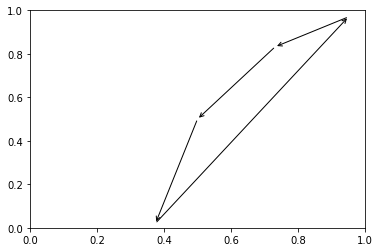

In [6]:
from matplotlib.collections import LineCollection
f,a = plt.subplots()
edges = draw_route([0,1,2,3,0], N, a)

In [7]:
def draw_points(coords, node_ids, ax):
    x,y = zip(*coords)
    x_depot, y_depot = x[0], y[0]
    x_customers, y_customers = x[1:],y[1:]
    ax.scatter(x_customers, y_customers, color="k", s=5, label="Customers")
    ax.scatter([x_depot], [y_depot], color="k", marker='s', s=20, label="Depot")
    add_labels(node_ids, coords, ax)

def draw_vehicle_routes(routes, route_colors, coords, ax):
    for route, color in zip(routes, route_colors):
        draw_route([0]+route+[0], coords, ax, color=color)
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
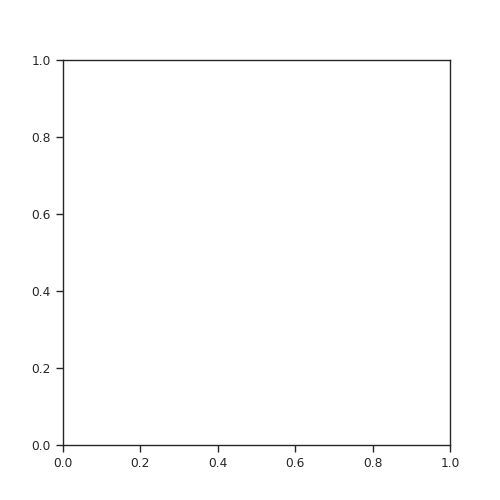

In [8]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import matplotlib.animation as animation
from IPython.display import HTML


fig, axis = plt.subplots(figsize=(5,5))
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']

def draw_routes(routes, node_ids, coords, vehicle_route_colors, ax):
    # Erase previous graph
    ax.cla()
    
    # Set limit box
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    ax.set_title(f"Cost: {get_total_cost(routes):6.2f}")
    
    # Draw routes and points
    draw_vehicle_routes(routes, vehicle_route_colors, coords, ax)
    draw_points(coords, node_ids, ax)        
    
    ax.legend()

#pprint([get_total_cost(s) for s in sorted_sol][:10])
animator = animation.FuncAnimation(
    fig,
    draw_routes,
    sorted_sol[:100],
    fargs=(nodes, N, colors, axis,),
    interval=10,
    repeat=False)
        

How many?

Example: How many possibilities to visit 8 customers using 3 vehicles?

Use the [star and bars](https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)) method:

    *******|| ---> V1=7     V2=0    V3=0
    ******|*| ---> V1=6     V2=1    V3=0
    ******||* ---> V1=5     V2=0    V3=1
    *****|**| ---> V1=5     V2=2    V3=0
    *****|*|*
    ****|***|
    ****|**|*
    ***|****|
    ***|***|*
    **|*****|
    **|****|*
    **|***|**
    **|**|***
    **|*|****
    *|******|
    *|*****|*
    *|****|**
    *|***|***
    *|**|****
    *|*|*****
    |*******|
    |******|*
    |*****|**
    |****|***
    |***|****
    |**|*****
    |*|******
    ||******* ---> V1=0     V2=0    V3=7


 ways can a vehicle visit 10 customers and 3 vehicles?


